# **InsurePro: Predicting Insurance Charges**
## **By: Arsh Vohra**
![pexels-pixabay-47327%20%281%29.jpg](attachment:pexels-pixabay-47327%20%281%29.jpg)

### Description:
**Harness the power of machine learning to predict insurance charges with our advanced ML model. By leveraging a variety of data, including features such as age, BMI, number of children, and region, our model can accurately estimate insurance charges for individuals.**

**To ensure optimal performance, we employ a data preprocessing step that involves scaling the numeric columns. Scaling is essential to bring the numeric features to a similar scale and prevent any single feature from dominating the learning process. By applying scaling techniques such as standardization or normalization, we ensure that the features have comparable ranges and enable our ML model to make accurate predictions.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'
import opendatasets as od
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
link='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/ff933238d9c30da179b7e3ad4b6ca938d67efc53/insurance.csv'

In [ ]:
od.download(link)

Using downloaded and verified file: .\insurance.csv


In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
(df.isna().sum()/df.shape[0])*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Univariate analysis

In [ ]:
#Age
fig = px.histogram(df,x='age',marginal='box',nbins=64,title="Distribution Of Age",color='smoker')
fig.update_layout(bargap=0.1)

 Total Number of Outliers in Age:0


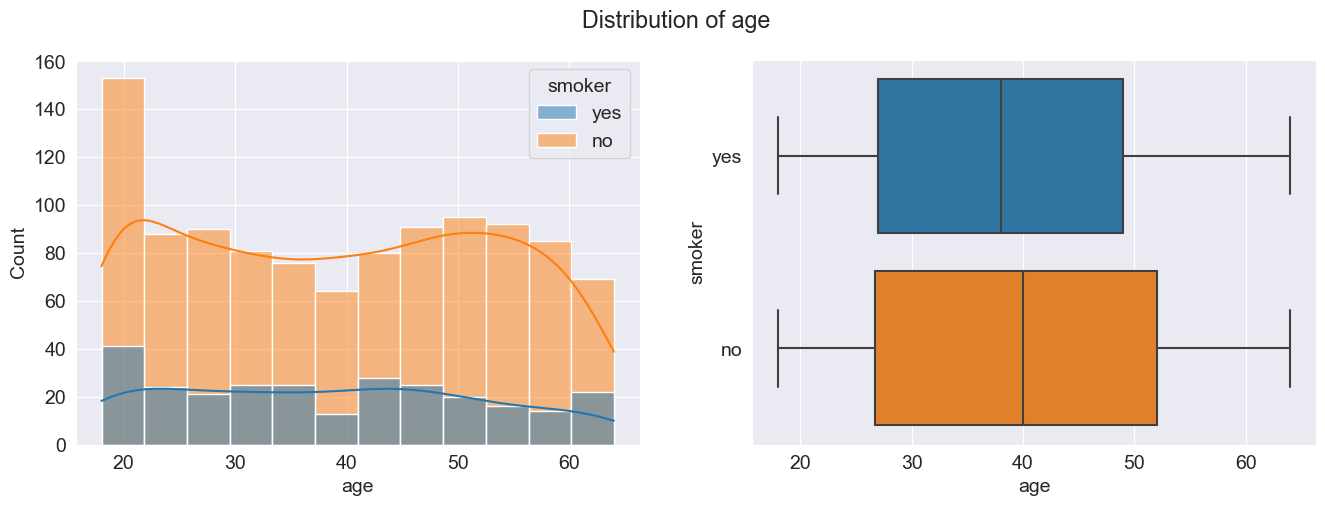

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
fig.suptitle("Distribution of age")

sns.histplot(data=df,x='age',kde=True,ax=axes[0],hue='smoker')
sns.boxplot(data=df,x='age',ax=axes[1],y='smoker')

q25,q75=np.percentile(df['age'],25),np.percentile(df['age'],75)

IQR =q75-q25

upper = q75 + (1.5*IQR)
lower = q25 - (1.5*IQR)

out=0
for i in df['age']:
  if i > upper or lower > i:
    out=+1

print("{} Total Number of Outliers in Age:{}".format('\033[1m',out))


In [ ]:
#BMI
fig = px.histogram(df,x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI'
                   )
fig.update_layout(bargap=0.1)

 Total Outliers in BMI:9


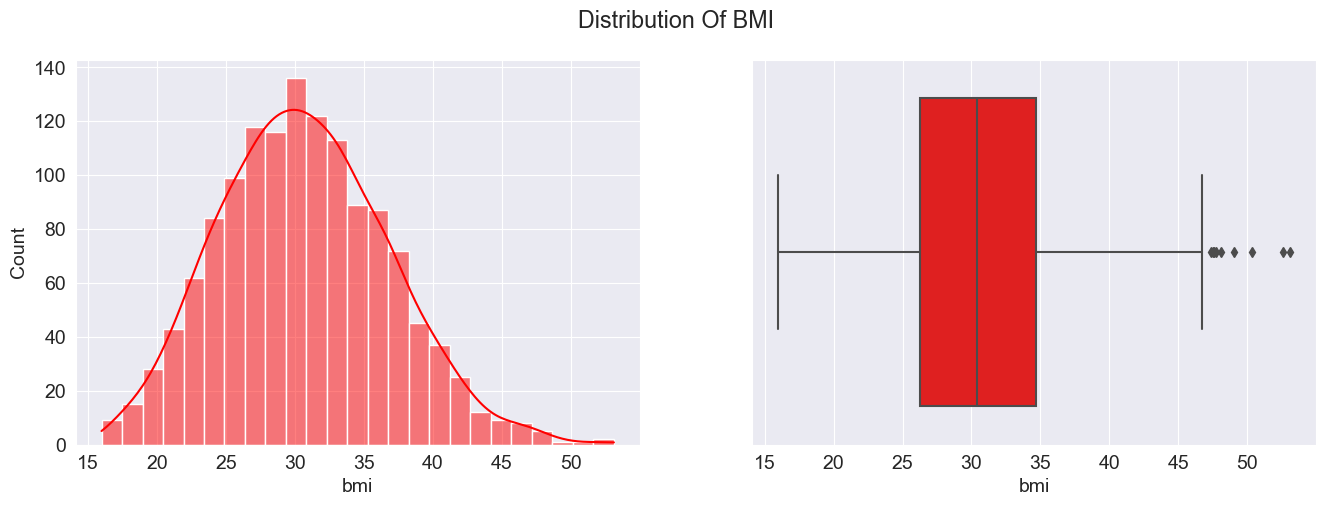

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
fig.suptitle("Distribution Of BMI")

sns.histplot(data=df,x='bmi',ax=axes[0],color='r',kde=True)
sns.boxplot(data=df,x='bmi',ax=axes[1],color='r')


q25,q75 = np.percentile(df['bmi'],25),np.percentile(df['bmi'],75)

IQR = q75-q25

upper = q75 + (1.5*IQR)
lower = q25 - (1.5*IQR)

out = 0
for i in df['bmi']:
  if i > upper or lower > i:
    out+=1
print("{} Total Outliers in BMI:{}".format('\033[1m',out))

In [ ]:
#Children
fig=px.histogram(df,x='children',
             marginal= 'box',
             color_discrete_sequence=['green'],
             title="Distribution of Children")
fig.update_layout(bargap=0.1)

 Total number of outerliers in Children:0


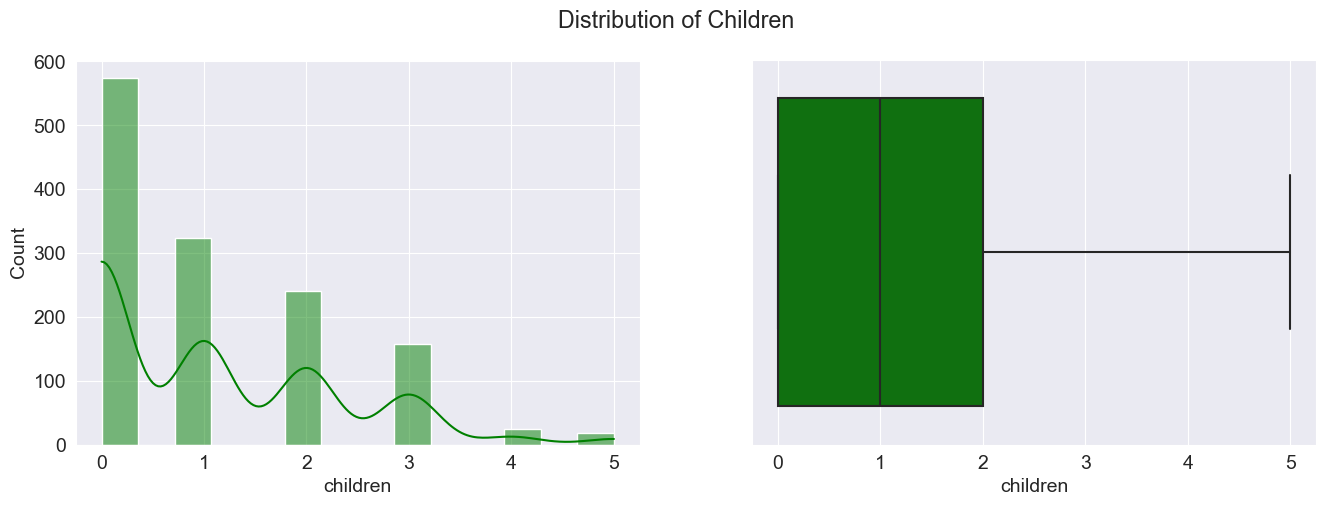

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))

sns.histplot(data=df,x='children',kde=True,color='g',ax=axes[0])
sns.boxplot(data=df,x='children',color='g',ax=axes[1])

fig.suptitle("Distribution of Children")

q25,q75 = np.percentile(df.children,25),np.percentile(df.children,75)

IQR = q75-q25

upper = q75 + (1.5*IQR)
lower = q25 - (1.5*IQR)

out=0

for i in df['children']:
  if i > upper or i < lower:
    out+=1

print("{} Total number of outerliers in Children:{}".format('\033[1m',out))

In [ ]:
#Charges
fig = px.histogram(df,x='charges',
                   color='smoker',
                   marginal='box',
                   color_discrete_sequence=['red','green'],
                   title = ("Distribution of Charges"))
fig.update_layout(bargap=0.1)

 Total number of outliers in Charges:139


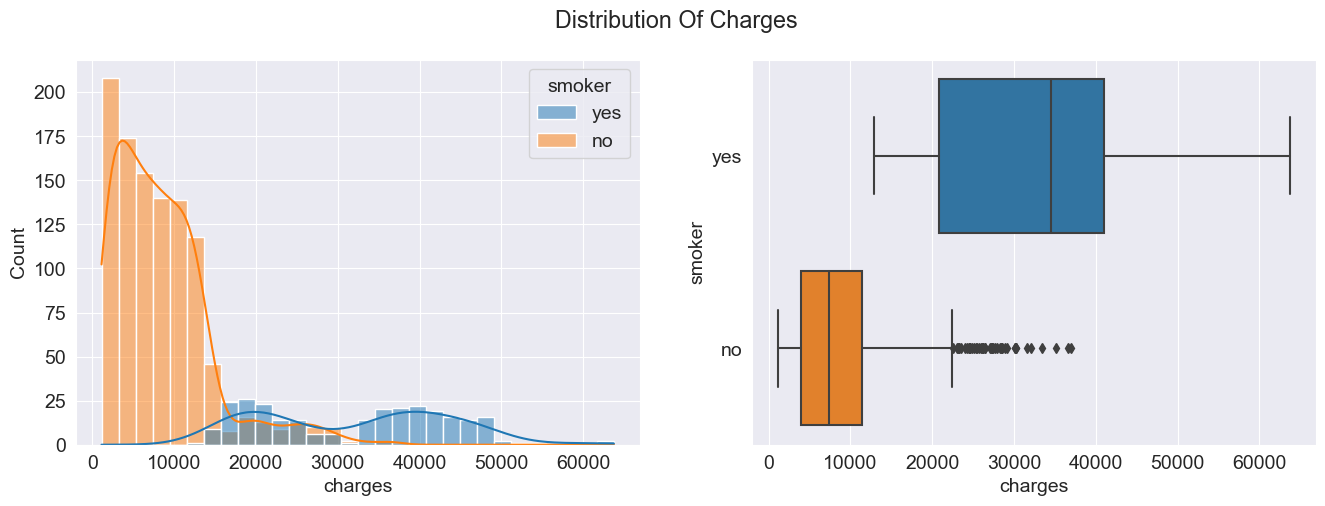

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))

sns.histplot(data=df,x='charges',hue='smoker',kde=True,ax=axes[0])
sns.boxplot(data=df,x='charges',y='smoker',ax=axes[1])

fig.suptitle("Distribution Of Charges")

q25,q75 = np.percentile(df.charges,25),np.percentile(df.charges,75)

IQR = q75-q25
upper = q75 + (1.5*IQR)
lower = q25 - (1.5*IQR)

out=0

for i in df['charges']:
  if i > upper or i < lower:
    out+=1

print("{} Total number of outliers in Charges:{}".format('\033[1m',out))

In [ ]:
px.histogram(df,x='sex',title="Distribution of Sex")

<Axes: ylabel='sex'>

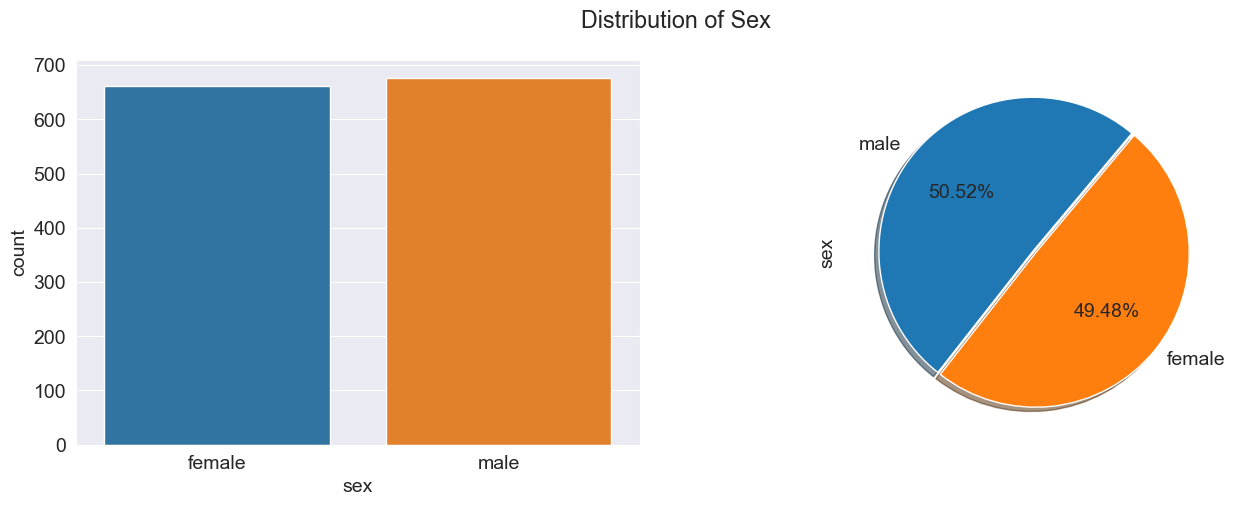

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,5))
fig.suptitle("Distribution of Sex")

sns.countplot(df,x="sex",ax=axes[0])
df['sex'].value_counts().plot(kind='pie',autopct='%0.2f%%',shadow=True,startangle=50,explode=[0.01,0.01])


In [ ]:
px.histogram(df, x='smoker', color='sex', title='Distribution of Smoker with respect to Sex')

<Axes: title={'center': 'Distribution of Smoker with respect to Sex'}, xlabel='smoker', ylabel='count'>

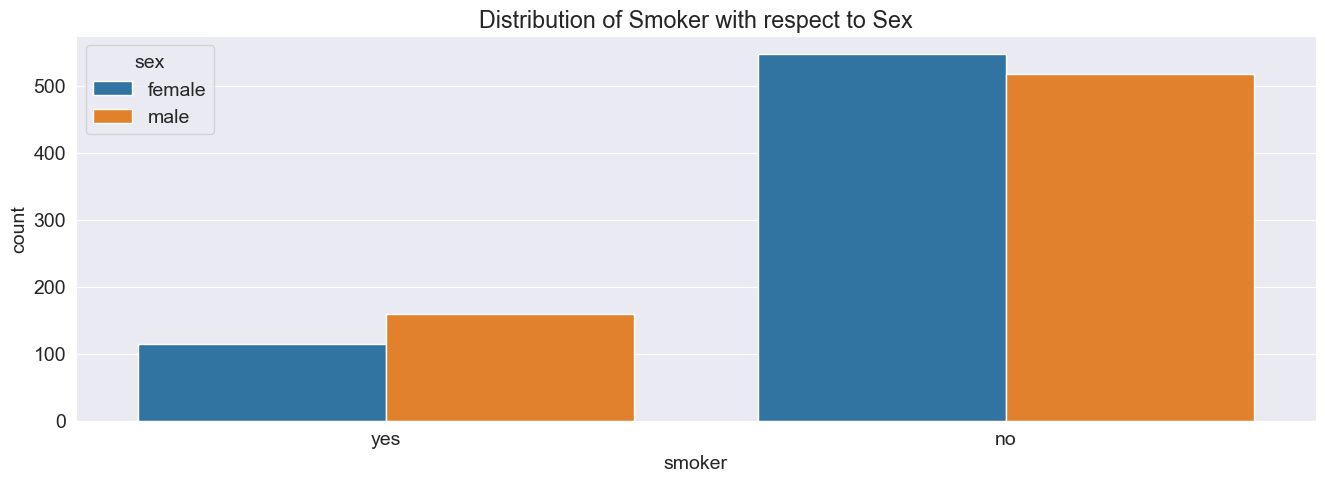

In [ ]:
plt.figure(figsize=(16,5))
plt.title("Distribution of Smoker with respect to Sex")

sns.countplot(df,x='smoker',hue='sex')

<Axes: title={'center': 'Distribution of Charges with respect to Region'}, xlabel='region', ylabel='charges'>

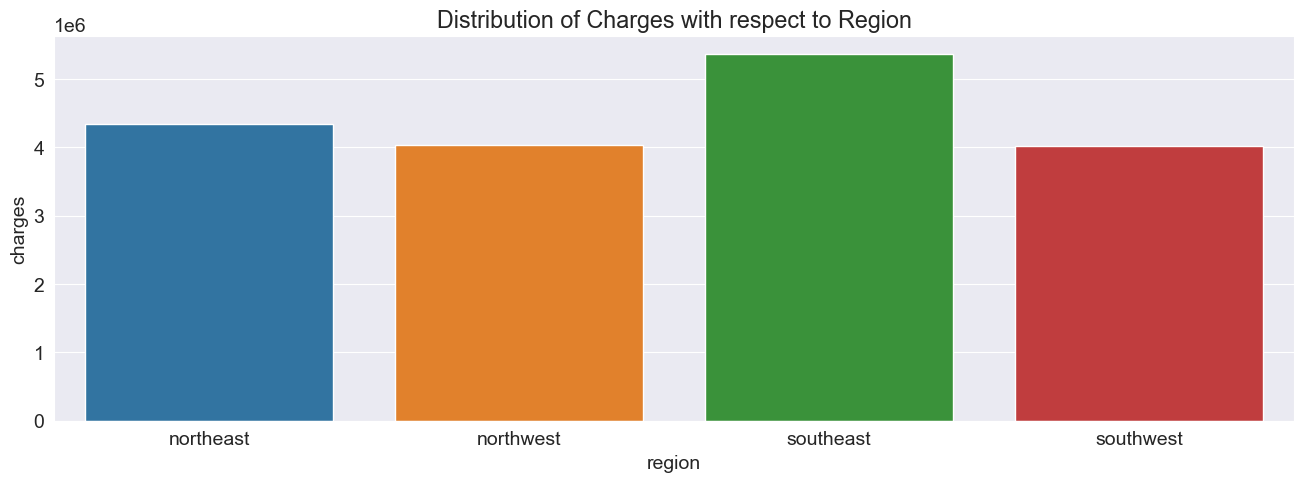

In [ ]:
plt.figure(figsize=(16,5))
plt.title("Distribution of Charges with respect to Region")
a= df.groupby(['region'])[['charges']].sum()

sns.barplot(a,y='charges',x=a.index,)

In [ ]:
px.scatter(df,x='age',y='charges',color='smoker',title="Charges Vs Age")

<Axes: title={'center': 'Charges Vs Age'}, xlabel='age', ylabel='charges'>

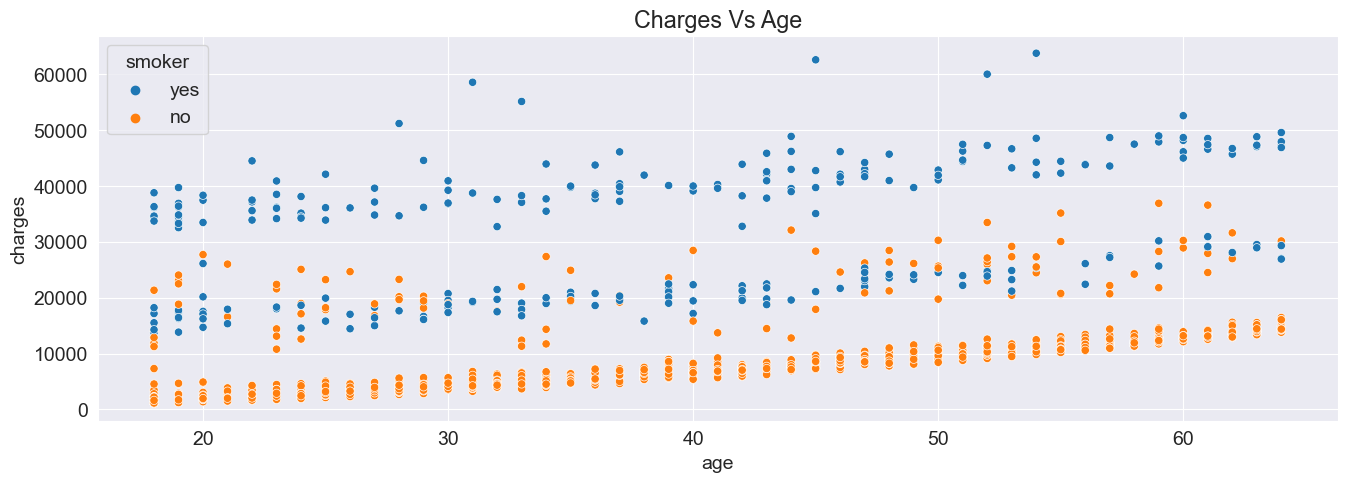

In [ ]:
plt.figure(figsize=(16,5))
plt.title("Charges Vs Age")
sns.scatterplot(df,x='age',y='charges',hue='smoker')

In [ ]:
px.scatter(df,x='bmi',y='charges',color='smoker',title="Charges Vs BMI")

<Axes: title={'center': 'Charges Vs BMI'}, xlabel='bmi', ylabel='charges'>

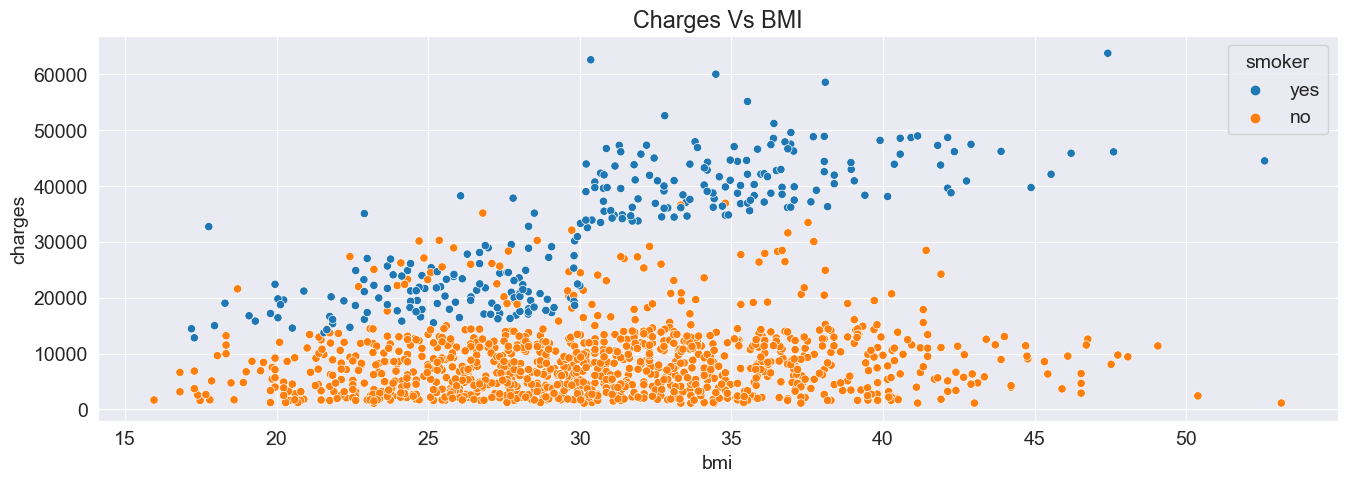

In [ ]:
plt.figure(figsize=(16,5))
plt.title("Charges Vs BMI")

sns.scatterplot(df,x='bmi',y='charges',hue='smoker')

C:\Users\Arsh\AppData\Local\Temp\ipykernel_22016\1168954917.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

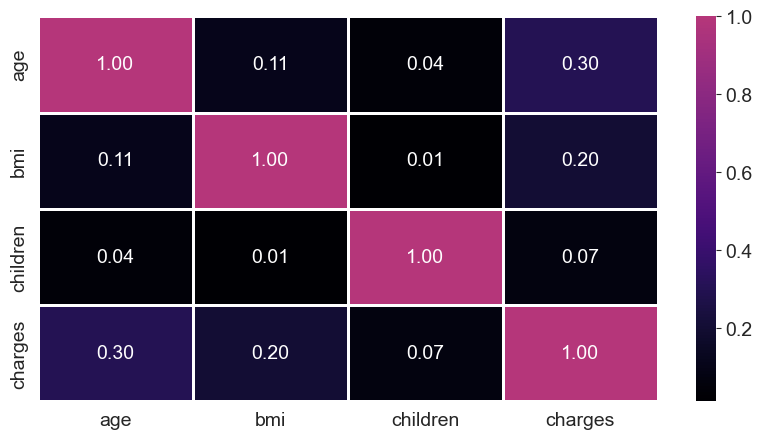

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='magma',linewidths=1,center=1)

In [ ]:
df['smoker'].replace({'no':0,'yes':1},inplace=True)
df['sex'].replace({'female':0,'male':1},inplace=True)
df= pd.get_dummies(df,columns=['region'])

In [ ]:
x = df.drop(['charges'],axis=1)

In [ ]:
y=df['charges']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
def rmse(y_true,y_pred):
    rmse = mean_squared_error(y_true,y_pred,squared=False)
    return rmse

In [ ]:
print("Accuracy on Training data is :{}".format(model.score(xtrain,ytrain)))
print("Accuracy on Testing data is :{}".format(model.score(xtest,ytest)))
print("RMSE on Train data is :{}".format(rmse(ytrain,model.predict(xtrain))))
print("RMSE on Test data is :{}".format(rmse(ytest,model.predict(xtest))))

Accuracy on Training data is :0.742398009060026
Accuracy on Testing data is :0.7696118054369009
RMSE on Train data is :6142.519818737067
RMSE on Test data is :5812.100272258874


In [ ]:
for i,j in enumerate(xtrain.columns):
  print("Weight of {} is {}".format(j,model.coef_[i]))

Weight of age is 261.29692414191965
Weight of sex is 104.81182298826343
Weight of bmi is 348.9069151601751
Weight of children is 424.11912829161696
Weight of smoker is 23628.367222359924
Weight of region_northeast is 596.056589237782
Weight of region_northwest is 109.12197876483239
Weight of region_southeast is -374.91224932883875
Weight of region_southwest is -330.2663186737813


In [ ]:
w=pd.DataFrame(model.coef_)
w.rename({0:"Weights"},axis=1,inplace=True)
w.rename({0:xtrain.columns[0],1:xtrain.columns[1],2:xtrain.columns[2],3:xtrain.columns[3],4:xtrain.columns[4],5:xtrain.columns[5],6:xtrain.columns[6],7:xtrain.columns[7],8:xtrain.columns[8]},axis=0,inplace=True)
w.reset_index(inplace=True)
w.rename(columns={w.columns[0]: 'Feature'},inplace=True)
w

,Feature,Weights
0,age,261.296924
1,sex,104.811823
2,bmi,348.906915
3,children,424.119128
4,smoker,23628.367222
5,region_northeast,596.056589
6,region_northwest,109.121979
7,region_southeast,-374.912249
8,region_southwest,-330.266319


In [ ]:
numeric_cols =['age','bmi','children']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(df[numeric_cols])

In [ ]:
numeric_df = pd.DataFrame(scaled_inputs).rename({0:"age",1:"bmi",2:"children"},axis=1)
numeric_df

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [ ]:
categorical_cols = ['sex','smoker','region_northeast','region_northwest','region_southeast','region_southwest']
categorical_df = df[categorical_cols]

In [ ]:
categorical_df

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
1333,1,0,0,1,0,0
1334,0,0,1,0,0,0
1335,0,0,0,0,1,0
1336,0,0,0,0,0,1


In [ ]:
new_df = pd.concat([numeric_df,categorical_df],axis=1)

In [ ]:
inputs = new_df
target = df['charges']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
scaled_model = LinearRegression()
scaled_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Accuracy on Training data is :{}".format(model.score(xtrain,ytrain)))
print("Accuracy on Testing data is :{}".format(model.score(xtest,ytest)))
print("RMSE on Train data is :{}".format(rmse(ytrain,model.predict(xtrain))))
print("RMSE on Test data is :{}".format(rmse(ytest,model.predict(xtest))))

Accuracy on Training data is :0.742398009060026
Accuracy on Testing data is :0.7696118054369009
RMSE on Train data is :6142.519818737067
RMSE on Test data is :5812.100272258874


In [ ]:
for i,j in enumerate(inputs.columns):
  print("Weight for {} is:{}".format(j,scaled_model.coef_[i]))

Weight for age is:3669.8392723470292
Weight for bmi is:2126.9043303283493
Weight for children is:511.08143575240115
Weight for sex is:104.81182298826657
Weight for smoker is:23628.367222359902
Weight for region_northeast is:596.0565892377891
Weight for region_northwest is:109.12197876484359
Weight for region_southeast is:-374.91224932884296
Weight for region_southwest is:-330.26631867377785


In [ ]:
pd.DataFrame({
    "Feature":np.append(numeric_cols + categorical_cols,1),
    "Weight": np.append(scaled_model.coef_,scaled_model.intercept_)
})

,Feature,Weight
0,age,3669.839272
1,bmi,2126.904330
2,children,511.081436
3,sex,104.811823
4,smoker,23628.367222
5,region_northeast,596.056589
6,region_northwest,109.121979
7,region_southeast,-374.912249
8,region_southwest,-330.266319
9,1,8437.701437


In [ ]:
new_w=pd.DataFrame(scaled_model.coef_)
new_w.rename({0:"Weights"},axis=1,inplace=True)
new_w.rename({0:inputs.columns[0],1:inputs.columns[1],2:inputs.columns[2],3:inputs.columns[3],4:inputs.columns[4],5:inputs.columns[5],6:inputs.columns[6],7:inputs.columns[7],8:inputs.columns[8]},axis=0,inplace=True)
new_w.reset_index(inplace=True)
new_w.rename(columns={new_w.columns[0]: 'Feature'},inplace=True)
new_w

,Feature,Weights
0,age,3669.839272
1,bmi,2126.904330
2,children,511.081436
3,sex,104.811823
4,smoker,23628.367222
5,region_northeast,596.056589
6,region_northwest,109.121979
7,region_southeast,-374.912249
8,region_southwest,-330.266319


In [ ]:
plt.rcParams['font.size']=30
fig,axis = plt.subplots(1,2,figsize=(55,15))
sns.barplot(w,x='Weights',y='Feature',ax=axis[0])
axis[0].set_title("Model without Scaling")
sns.barplot(new_w,x='Weights',y='Feature',ax=axis[1])
axis[1].set_title("Model after Scaling")
fig.suptitle("Model Comparison")
fig.set_dpi(300)

In [ ]:
px.bar(w,x='Weights',y='Feature',title='Model without Scaling')

In [ ]:
px.bar(new_w,x='Weights',y='Feature',title='Model after Scaling')